In [ ]:
# importing some basic libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/processed_data1.csv')
df

,review,sentiment
0,one review ha mention watch 1 Oz episod youll ...,positive
1,wonder littl product film techniqu veri unassu...,positive
2,thought thi wa wonder way spend time hot summe...,positive
3,basic famili littl boy jake think zombi hi clo...,negative
4,petter mattei love time money visual stun film...,positive
...,...,...
25327,Im huge classic film buff get silent movi lot ...,positive
25328,cant believ mani compar thi movi argento hi wo...,negative
25329,movi absolut sillybut expect highbrow intellec...,positive
25330,thi wa pleasant music creation moulin roug dan...,positive


In [ ]:
sent = pd.Series(np.where(df.sentiment.values == 'positive',1,0))
sent
y_train = sent[0:399]
y_test = sent[400:499]
y_train

0      1
1      1
2      1
3      0
4      1
      ..
394    1
395    0
396    0
397    1
398    0
Length: 399, dtype: int64

In [ ]:
docs = df.review.to_numpy().tolist()

len(docs)

25332

In [ ]:
# docA = "good boy"
# docB = "good girl"
# docC = "boy girl good"

# docs=[docA,docB,docC]
bows=[]

for doc in docs[0:499]:
  bows.append(doc.split(" "))

sets=[]
for s in bows:
  sets.append(set(s))
wordSet=set().union(*sets)

# for i in range (len(bows)):

#   wordSet.union(set(bows[i]))
  
# print(set().union(*sets))
# bowA = docA.split(" ")
# bowB = docB.split(" ")
# bowC = docC.split(" ")

# wordSet = set(bowA).union(set(bowB)).union(set(bowC))
#print(wordSet)


len(wordSet)

10772

In [ ]:
wordDicts=[]
for bow in bows:
  wordDict =dict.fromkeys(wordSet,0)
  for word in bow:
    wordDict[word]+=1
    wordDicts.append(wordDict)
# wordDictA = dict.fromkeys(wordSet,0)
# wordDictB = dict.fromkeys(wordSet,0)
# wordDictC = dict.fromkeys(wordSet,0)

#BoW
# for word in bowA:
#     wordDictA[word]+=1
# for word in bowB:
#     wordDictB[word]+=1
# for word in bowC:
#     wordDictC[word]+=1

In [ ]:
def computeTF(wordDict,bow):
    tfDict = {}
    bowCount = len(bow)
    for word,count in wordDict.items():
        #TF = No.of reps words in a sentence/ Total words in a sentence
        tfDict[word] = count/float(bowCount)
    return tfDict

In [ ]:
tfBows=[]
for i in range(len(bows)):
  tfBows.append(computeTF(wordDicts[i],bows[i]))
# tfBowA = computeTF(wordDictA,bowA)
# tfBowB = computeTF(wordDictB,bowB)
# tfBowC = computeTF(wordDictC,bowC)

In [ ]:
def computeIDF(docList):
    import math
    idfDict = {}
    N = len(docList)
    
    #{'girl':0 ,'good':0,'boy':0}
    idfDict = dict.fromkeys(docList[0].keys(),0)
    
    #Lets find the number of docs which contain word(Wi)
    for doc in docList:
        for word,val in doc.items():
            if val >0:
                idfDict[word]+=1
    #{'girl':2 ,'good':3,'boy':2}
    #IDF calculation
    for word,val in idfDict.items():
#         idfDict[word] = math.log10(N/float(val)) 
        idfDict[word] = math.log10((N+1)/(float(val)+1.0))+1
    return idfDict

In [ ]:
idfs = computeIDF([wordDict for wordDict in wordDicts])

In [ ]:
def computeTFIDF(tfBow,idfs):
    tfidf ={}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [ ]:
tfidfBows=[]
for i in range(len(bows)):
  tfidfBows.append(computeTFIDF(tfBows[i],idfs))
# tfidfBowA = computeTFIDF(tfBowA,idfs)
# tfidfBowB = computeTFIDF(tfBowB,idfs)
# tfidfBowC = computeTFIDF(tfBowC,idfs)

In [ ]:
import pandas as pd
kk=pd.DataFrame([tfidfBow for tfidfBow in tfidfBows])
kk.head(5)

,scan,damian,barclay,chad,ruffalo,sherlock,fmv,hay,instructor,pastso,...,sloppi,preschool,viewer,verbinski,undecid,mosti,criterion,aya,schumach,dispatch
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
kk.zombiefido

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
494    0.0
495    0.0
496    0.0
497    0.0
498    0.0
Name: zombiefido, Length: 499, dtype: float64

In [ ]:
X_train = kk[0:399]
X_test = kk[400:499]

In [ ]:
# docA = "good boy"
# docB = "good girl"
# docC = "boy girl good"

# docs=[docA,docB,docC]

from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer(norm ='l2')
tfidf = TfidfVectorizer(use_idf=True)
response = tfidf.fit_transform([doc for doc in docs[0:499]])

dd=pd.DataFrame(response.toarray(),columns = tfidf.get_feature_names())
dd.head(5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,007,02,0510,10,100,1000,10000,100000,10002000,101,...,zombi,zombiefido,zombieok,zombievers,zone,zoo,zoom,zucker,zulu,zwick
0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.07134,0.0,0.0,0.0,0.0,0.0,0.0,...,0.104047,0.0,0.140872,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train1 = np.array(dd[0:399])
                    
X_test1 = np.array(dd[400:499])

In [ ]:
sum(kk.zombiefido)==sum(dd.zombiefido)

False

In [ ]:
# y_train.dtype
X_train = np.array(X_train)
X_train.dtype

dtype('float64')

In [ ]:
X_test = np.array(X_test)
X_test.dtype

dtype('float64')

In [ ]:
class SVM(object):
    def __init__(self,visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    
    def fit(self,data):
        #train with data
        self.data = data
        # { |\w\|:{w,b}}
        opt_dict = {}
        
        transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
        
        all_data = np.array([])
        for yi in self.data:
            all_data = np.append(all_data,self.data[yi])
                    
        self.max_feature_value = max(all_data)         
        self.min_feature_value = min(all_data)
        all_data = None
        
        #with smaller steps our margins and db will be more precise
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      #point of expense
                      self.max_feature_value * 0.001,]
        
        #extremly expensise
        b_range_multiple = 5
        #we dont need to take as small step as w
        b_multiple = 5
        
        latest_optimum = self.max_feature_value*10
        
        """
        objective is to satisfy yi(x.w)+b>=1 for all training dataset such that ||w|| is minimum
        for this we will start with random w, and try to satisfy it with making b bigger and bigger
        """
        #making step smaller and smaller to get precise value
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            
            #we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*self.max_feature_value*b_range_multiple,
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        
                        #weakest link in SVM fundamentally
                        #SMO attempts to fix this a bit
                        # ti(xi.w+b) >=1
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b)>=1:
                                    found_option=False
                        if found_option:
                            """
                            all points in dataset satisfy y(w.x)+b>=1 for this cuurent w_t, b
                            then put w,b in dict with ||w|| as key
                            """
                            opt_dict[np.linalg.norm(w_t)]=[w_t,b]
                
                #after w[0] or w[1]<0 then values of w starts repeating itself because of transformation
                #Think about it, it is easy
                #print(w,len(opt_dict)) Try printing to understand
                if w[0]<0:
                    optimized=True
                    print("optimized a step")
                else:
                    w = w-step
                    
            # sorting ||w|| to put the smallest ||w|| at poition 0 
            norms = sorted([n for n in opt_dict])
            #optimal values of w,b
            opt_choice = opt_dict[norms[0]]

            self.w=opt_choice[0]
            self.b=opt_choice[1]
            
            #start with new latest_optimum (initial values for w)
            latest_optimum = opt_choice[0][0]+step*2
    
    def predict(self,features):
        #sign(x.w+b)
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification!=0 and self.visualization:
            self.ax.scatter(features[0],features[1],s=200,marker='*',c=self.colors[classification])
        return (classification,np.dot(np.array(features),self.w)+self.b)
    
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,c=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        # hyperplane = x.w+b (actually its a line)
        # v = x0.w0+x1.w1+b -> x1 = (v-w[0].x[0]-b)/w1
        #psv = 1     psv line ->  x.w+b = 1a small value of b we will increase it later
        #nsv = -1    nsv line ->  x.w+b = -1
        # dec = 0    db line  ->  x.w+b = 0
        def hyperplane(x,w,b,v):
            #returns a x2 value on line when given x1
            return (-w[0]*x-b+v)/w[1]
       
        hyp_x_min= self.min_feature_value*0.9
        hyp_x_max = self.max_feature_value*1.1
        
        # (w.x+b)=1
        # positive support vector hyperplane
        pav1 = hyperplane(hyp_x_min,self.w,self.b,1)
        pav2 = hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[pav1,pav2],'k')
        
        # (w.x+b)=-1
        # negative support vector hyperplane
        nav1 = hyperplane(hyp_x_min,self.w,self.b,-1)
        nav2 = hyperplane(hyp_x_max,self.w,self.b,-1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nav1,nav2],'k')
        
        # (w.x+b)=0
        # db support vector hyperplane
        db1 = hyperplane(hyp_x_min,self.w,self.b,0)
        db2 = hyperplane(hyp_x_max,self.w,self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2],'y--')

In [ ]:
#defining a basic data
data_dict = {-1:np.array([[1,7],[2,8],[3,8]]),1:np.array([[5,1],[6,-1],[7,3]])}

optimized a step
optimized a step
optimized a step


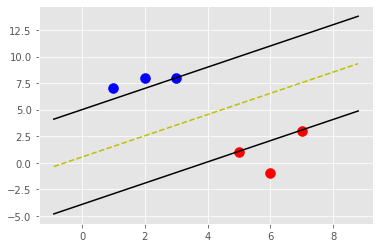

In [ ]:
svm = SVM() # Linear Kernel
svm.fit(data=data_dict) #data=data_dict
svm.visualize()

In [ ]:
svm.predict([3,8])

(-1.0, -1.000000000000098)